In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

pd.options.mode.chained_assignment = None



# read in the data
df = pd.read_csv(r'/Users/ruth/Downloads/healthcare-dataset-stroke-data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ruth/Downloads/healthcare-dataset-stroke-data.csv'

In [ ]:
df.head()

In [3]:
#Rename the columns

df= df.rename(columns ={'id': 'Id',
         'gender' : 'Gender',
         'age'  : 'Age' ,
         'hypertension': 'Hypertension',
         'heart_disease': 'Heart_disease',
          'ever_married': 'Ever_Married',
          'work_type' :'Work_Type',
          'Residence_type' :'Residence_Type',
          'avg_glucose_level':'Avg_Glucose_Level',
          'bmi': 'BMI',
          'smoking_status':'Smoking_Status',
           'stroke' :'Stroke'})


In [4]:
df.columns

Index(['Id', 'Gender', 'Age', 'Hypertension', 'Heart_disease', 'Ever_Married',
       'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'BMI',
       'Smoking_Status', 'Stroke'],
      dtype='object')

In [42]:
#looking for missing data

for col in df.columns:
    missing_perce= np.mean(df[col].isnull())
    print('{} = {}%'.format(col,missing_perce))

Id = 0.0%
Gender = 0.0%
Age = 0.0%
Hypertension = 0.0%
Heart_disease = 0.0%
Ever_Married = 0.0%
Work_Type = 0.0%
Residence_Type = 0.0%
Avg_Glucose_Level = 0.0%
BMI = 0.03933463796477495%
Smoking_Status = 0.0%
Stroke = 0.0%


In [5]:
#change data types of the columns

df['Age'] = df['Age'].astype('int64')


In [6]:
#looking on the data type
df.dtypes

Id                     int64
Gender                object
Age                    int64
Hypertension           int64
Heart_disease          int64
Ever_Married          object
Work_Type             object
Residence_Type        object
Avg_Glucose_Level    float64
BMI                  float64
Smoking_Status        object
Stroke                 int64
dtype: object

In [7]:
#df['id'].drop_duplicates().sort_values(ascending = False)
df.drop_duplicates()

,Id,Gender,Age,Hypertension,Heart_disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# displaying the entire data
#pd.set_option('display.max_rows', None)


In [1]:


# sort by age 
df.sort_values(by=['Age'], inplace = False, ascending= False)

NameError: name 'df' is not defined

In [ ]:
#fill the null value with 0
df= df.fillna(0)


In [19]:
df.isnull().sum()

Id                   0
Gender               0
Age                  0
Hypertension         0
Heart_disease        0
Ever_Married         0
Work_Type            0
Residence_Type       0
Avg_Glucose_Level    0
BMI                  0
Smoking_Status       0
Stroke               0
dtype: int64

In [14]:
#Looking on Correlations
corr=df[['Age','Avg_Glucose_Level','Heart_disease','Hypertension', 'Stroke', 'BMI']].corr()
corr

,Age,Avg_Glucose_Level,Heart_disease,Hypertension,Stroke,BMI
Age,1.000000,0.238060,0.263668,0.276303,0.245128,0.333738
Avg_Glucose_Level,0.238060,1.000000,0.161857,0.174474,0.131945,0.175502
Heart_disease,0.263668,0.161857,1.000000,0.108306,0.134914,0.041357
Hypertension,0.276303,0.174474,0.108306,1.000000,0.127904,0.167811
Stroke,0.245128,0.131945,0.134914,0.127904,1.000000,0.042374
BMI,0.333738,0.175502,0.041357,0.167811,0.042374,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

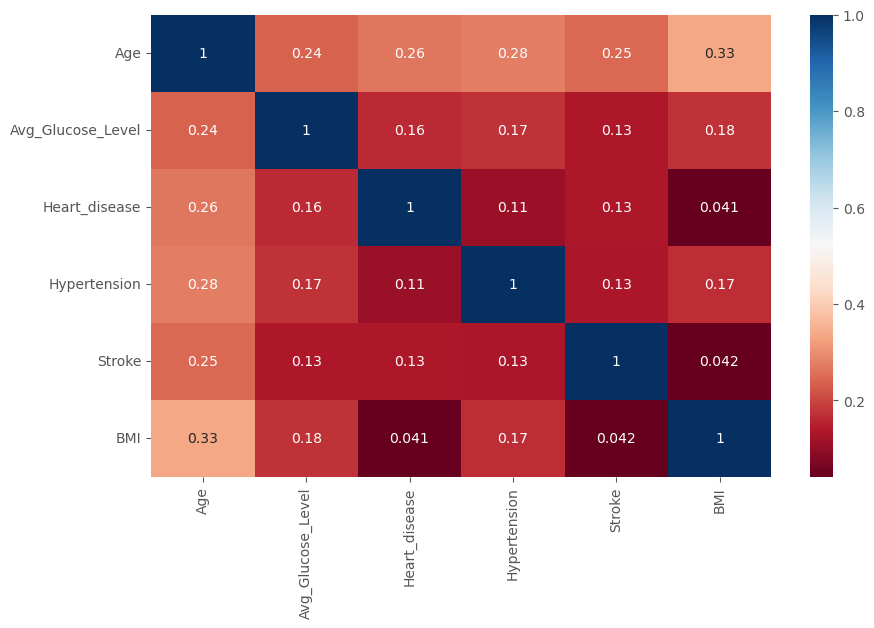

In [16]:
#Visualizing the correlation
sns.heatmap(corr, cmap='RdBu', annot = True)
plt.show

In [9]:
# Num of people by Gender

Num_Cases_Gender= df.groupby('Gender')
Num_Cases_Gender.agg({'Id' :'count'})

,Id
Gender,
Female,2994
Male,2115
Other,1


In [10]:
#Creating a dataframe to use it for visiualization
NumByGender=pd.DataFrame({'Gender':['Female','Male','other'],
                         'Num':[2994,2115, 1],
                         })
NumByGender

,Gender,Num
0,Female,2994
1,Male,2115
2,other,1


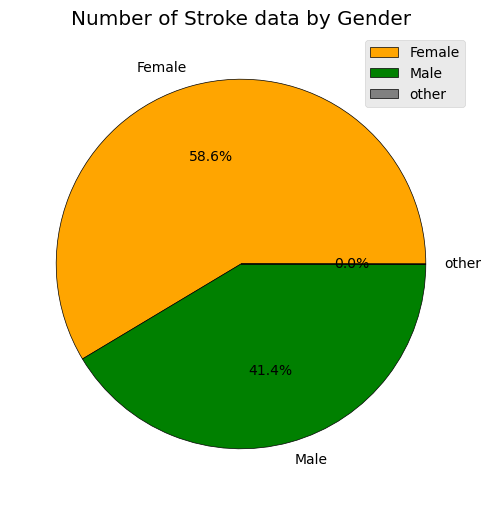

In [11]:
colors= ['orange','green', 'gray']

plt.pie(NumByGender.Num, labels=NumByGender.Gender, autopct='%1.1f%%', colors=colors, wedgeprops={'edgecolor':'black'})

plt.legend(loc='upper right', fontsize=10)
plt.title('Number of Stroke data by Gender')
plt.show()

In [ ]:
# casting Age to int
df['Age'] = df['Age'].astype('int64')

In [125]:
# Age data
Num_Cases_Gender.agg({'Age': ['max','min', 'mean']})

Age               
       max min       mean
Gender                   
Female  82   0  43.748497
Male    82   0  42.468558
Other   26  26  26.000000

In [86]:

Age_Data=pd.DataFrame({'Gender':['Female','male'],'Max_Age':[82,82],
                      'Min_Age':[0,0], 
                      'Mean': [43.748497,42.468558]})

Age_Data

,Gender,Max_Age,Min_Age,Mean
0,Female,82,0,43.748497
1,male,82,0,42.468558


<Axes: xlabel='Gender', ylabel='Age'>

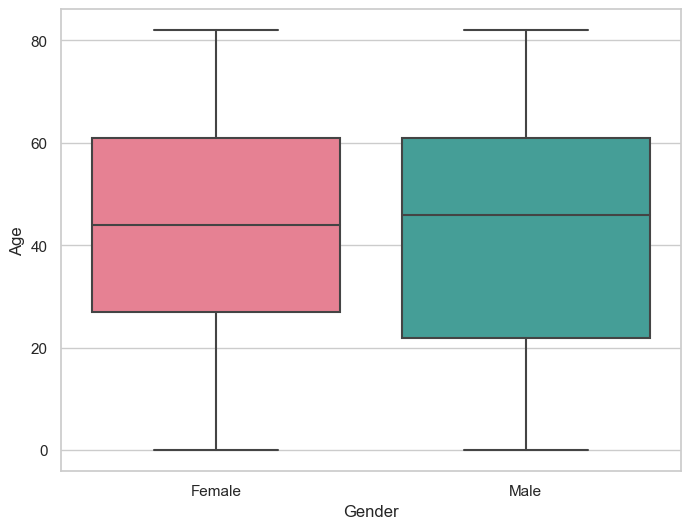

In [17]:
sns.set(style= 'whitegrid')
fig, ax=plt.subplots(figsize=(8,6))

sns.boxplot(x='Gender', y= 'Age', order=['Female', 'Male'],data= df, palette='husl')

In [56]:
df.describe()

,Id,Age,Hypertension,Heart_disease,Avg_Glucose_Level,BMI,Stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.215264,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.633866,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [60]:
# Heart disease data
heart_Cases=df.groupby(['Gender','Heart_disease' ]).agg({'Id':'count'})
heart_Cases

Id
Gender Heart_disease      
Female 0              2881
       1               113
Male   0              1952
       1               163
Other  0                 1

In [59]:
No_Heart_disease_Data=pd.DataFrame({'Gender':['Female','Male'],
                           'Num': [2881, 1952]})
No_Heart_disease_Data

,Gender,Num
0,Female,2881
1,Male,1952


In [58]:
HeartCases_Data=pd.DataFrame({'Gender':['Female','Male'],
                           'Num': [113, 163]})
HeartCases_Data

,Gender,Num
0,Female,113
1,Male,163


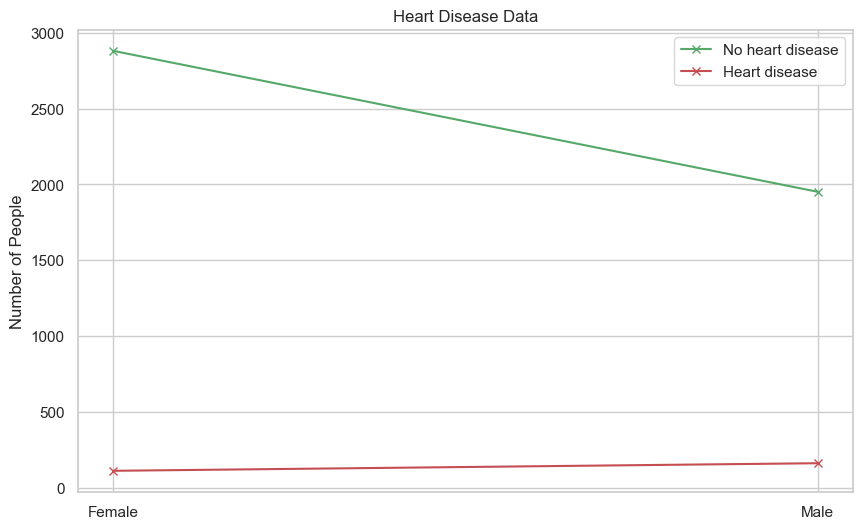

In [62]:
plt.plot(No_Heart_disease_Data.Gender, No_Heart_disease_Data.Num, 'gx-')
plt.plot(HeartCases_Data.Gender, HeartCases_Data.Num, 'rx-')
plt.legend(['No heart disease','Heart disease'])
plt.ylabel('Number of People')
plt.title('Heart Disease Data')

plt.show()

In [87]:
sroke_cases=df.groupby(['Gender','Stroke']).agg({'Id':'count'})
sroke_cases

Id
Gender Stroke      
Female 0       2853
       1        141
Male   0       2007
       1        108
Other  0          1

In [89]:
hyertension_cases= df.groupby(['Gender','Hypertension']).agg({'Id':'count'})
hyertension_cases

Id
Gender Hypertension      
Female 0             2718
       1              276
Male   0             1893
       1              222
Other  0                1

In [8]:
ever_married= df.groupby(['Gender','Ever_Married', 'Stroke']).agg({'Id':'count'})
ever_married

Id
Gender Ever_Married Stroke      
Female No           0        972
                    1         21
       Yes          0       1881
                    1        120
Male   No           0        755
                    1          8
       Yes          0       1252
                    1        100
Other  No           0          1

In [10]:
Non_Married_NoStroke_Data= pd.DataFrame({
                           'Gender': ['Female', 'Male'],
                           'Ever_married':['No', 'No'],
                           'Stroke': [0, 0],
                           'Num':[972, 755]
                           })
                           
Non_Married_NoStroke_Data
#[1881,120],[755, 8],[1252, 100]]                                       

,Gender,Ever_married,Stroke,Num
0,Female,No,0,972
1,Male,No,0,755


In [11]:
Non_Married_Stroke_Data=pd.DataFrame({'Gender': ['Female', 'Male'],
                           'Ever_married':['No', 'No'],
                           'Stroke': [1, 1],
                           'Num':[21, 8]
                         })


Non_Married_Stroke_Data

,Gender,Ever_married,Stroke,Num
0,Female,No,1,21
1,Male,No,1,8


In [12]:
Married_NoSroke_Data= pd.DataFrame({'Gender': ['Female', 'Male'],
                           'Ever_married':['yes', 'yes'],
                           'Stroke': [0, 0],
                           'Num':[1881, 1252]
                           })
Married_NoSroke_Data

,Gender,Ever_married,Stroke,Num
0,Female,yes,0,1881
1,Male,yes,0,1252


In [8]:
Married_Sroke_Data= pd.DataFrame({'Gender': ['Female', 'Male'],
                           'Ever_married':['yes', 'yes'],
                           'Stroke': [1, 1],
                           'Num':[120, 100]
                           })
Married_Sroke_Data

,Gender,Ever_married,Stroke,Num
0,Female,yes,1,120
1,Male,yes,1,100


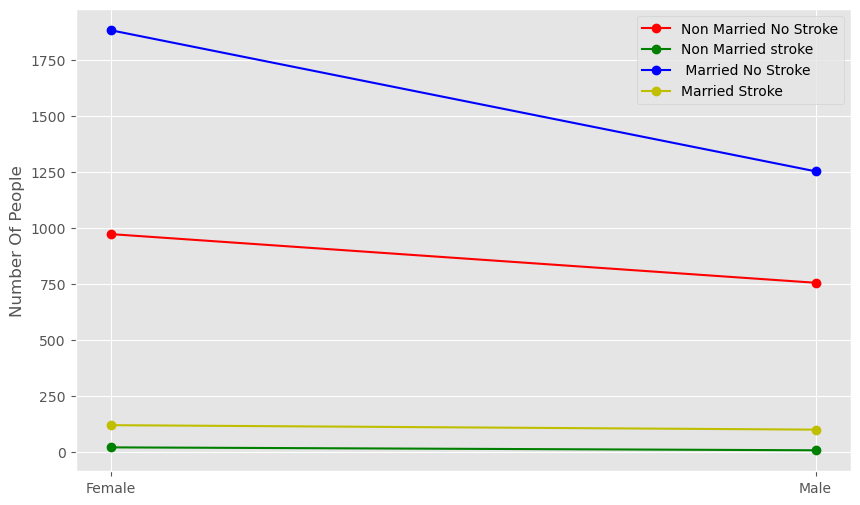

In [13]:
plt.plot(Non_Married_NoStroke_Data.Gender, Non_Married_NoStroke_Data.Num, 'ro-')
plt.plot(Non_Married_Stroke_Data.Gender, Non_Married_Stroke_Data.Num, 'go-' )
plt.plot(Married_NoSroke_Data.Gender, Married_NoSroke_Data.Num, 'bo-')
plt.plot(Married_Sroke_Data.Gender, Married_Sroke_Data.Num, 'yo-')
plt.legend(['Non Married No Stroke', 'Non Married stroke',' Married No Stroke','Married Stroke' ])
plt.ylabel('Number Of People')
plt.show()


In [110]:
Work= df.groupby(['Gender','Work_Type']).agg({'Id':'count'})
Work

Id
Gender Work_Type          
Female Govt_job        399
       Never_worked     11
       Private        1754
       Self-employed   504
       children        326
Male   Govt_job        258
       Never_worked     11
       Private        1170
       Self-employed   315
       children        361
Other  Private           1

In [14]:
workType_data= pd.DataFrame({'Gender':['Female','Male'],
                             'Work_Type':['Govt_Job','Govt_Job'],
                             'Num':[399,258]
                           })

workType_data

,Gender,Work_Type,Num
0,Female,Govt_Job,399
1,Male,Govt_Job,258


In [120]:


Work= df.groupby(['Work_Type', 'Stroke']).agg({'Id':'count'})
Work 

Id
Work_Type     Stroke      
Govt_job      0        624
              1         33
Never_worked  0         22
Private       0       2776
              1        149
Self-employed 0        754
              1         65
children      0        685
              1          2

In [39]:
NoStroke_work=pd.DataFrame({'workType':['Govt_job','Never_worked','Private','Self-employed','children'],
                         'stroke':[0,0,0,0,0],
                         'Num':[624,22,2776,754,685]})

NoStroke_work

,workType,stroke,Num
0,Govt_job,0,624
1,Never_worked,0,22
2,Private,0,2776
3,Self-employed,0,754
4,children,0,685


In [40]:
Stroke_work=pd.DataFrame({'workType':['Govt_job','Never_worked','Private','Self-employed','children'],
                          'Stroke':[1,1,1,1,1],
                          'Num':[33,0,149,65,2]
                          
    
})

Stroke_work




,workType,Stroke,Num
0,Govt_job,1,33
1,Never_worked,1,0
2,Private,1,149
3,Self-employed,1,65
4,children,1,2


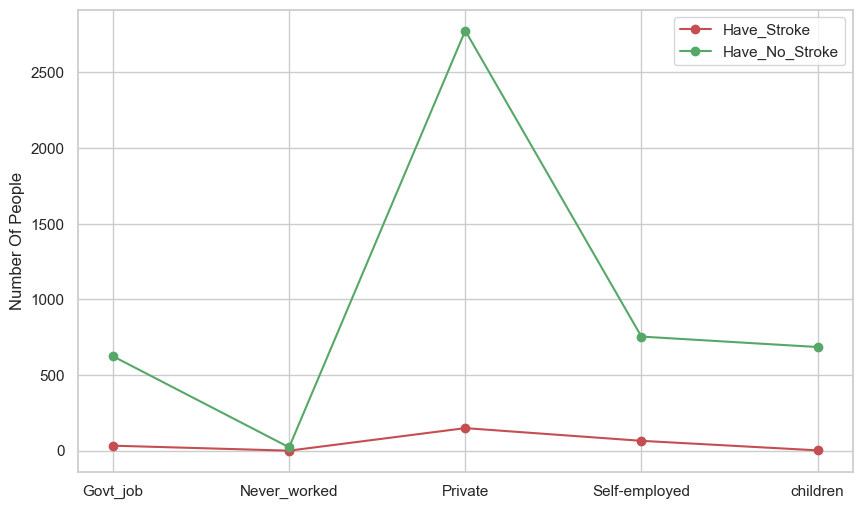

In [41]:
plt.plot(Stroke_work.workType, Stroke_work.Num, 'ro-')
plt.plot(NoStroke_work.workType, NoStroke_work.Num, 'go-' )
plt.legend(['Have_Stroke', 'Have_No_Stroke' ])
plt.ylabel('Number Of People')
plt.show()


In [130]:
residence_Type= df.groupby(['Residence_Type', 'Stroke']).agg({'Id':'count'})
residence_Type

Id
Residence_Type Stroke      
Rural          0       2400
               1        114
Urban          0       2461
               1        135

In [47]:
Smoking =df.groupby(['Smoking_Status', 'Stroke']).agg({'Id': 'count'})
Smoking

Id
Smoking_Status  Stroke      
Unknown         0       1497
                1         47
formerly smoked 0        815
                1         70
never smoked    0       1802
                1         90
smokes          0        747
                1         42

In [54]:
Smoking_unknown= pd.DataFrame({'Stroke':['Yes','No'],
                              'Num':[47,1497]})
Smoking_unknown

,Stroke,Num
0,Yes,47
1,No,1497


In [53]:
Smoking_formerly= pd.DataFrame({'Stroke':['Yes','No'],
                              'Num':[70,815]})
Smoking_formerly

,Stroke,Num
0,Yes,70
1,No,815


In [52]:
Smoking_smokes= pd.DataFrame({'Stroke':['Yes','No'],
                              'Num':[90,1802]})
Smoking_smokes

,Stroke,Num
0,Yes,90
1,No,1802


In [50]:
Smoking_Never= pd.DataFrame({'Stroke':['Yes','No'],
                              'Num':[42,747]})
Smoking_Never

,Stroke,Num
0,Yes,42
1,No,747


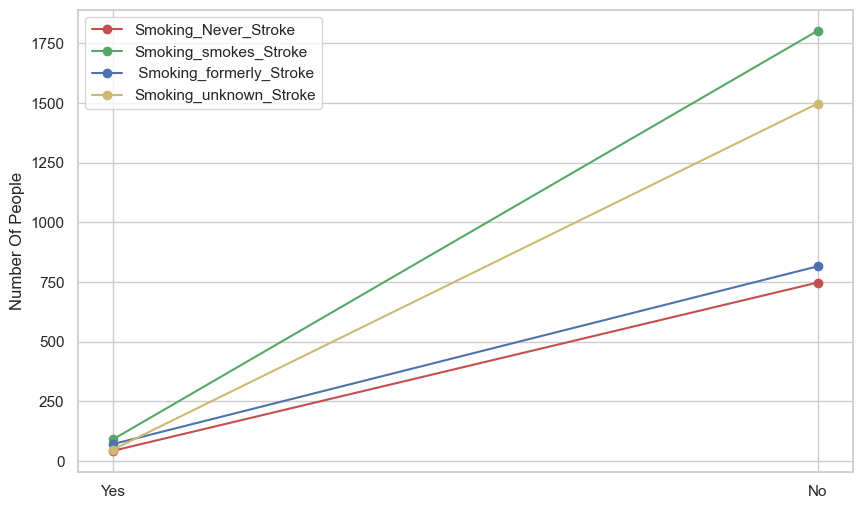

In [55]:
plt.plot(Smoking_Never.Stroke, Smoking_Never.Num, 'ro-')
plt.plot(Smoking_smokes.Stroke, Smoking_smokes.Num, 'go-' )
plt.plot(Smoking_formerly.Stroke, Smoking_formerly.Num, 'bo-')
plt.plot(Smoking_unknown.Stroke, Smoking_unknown.Num, 'yo-')
plt.legend(['Smoking_Never_Stroke', 'Smoking_smokes_Stroke',' Smoking_formerly_Stroke','Smoking_unknown_Stroke' ])
plt.ylabel('Number Of People')
plt.show()


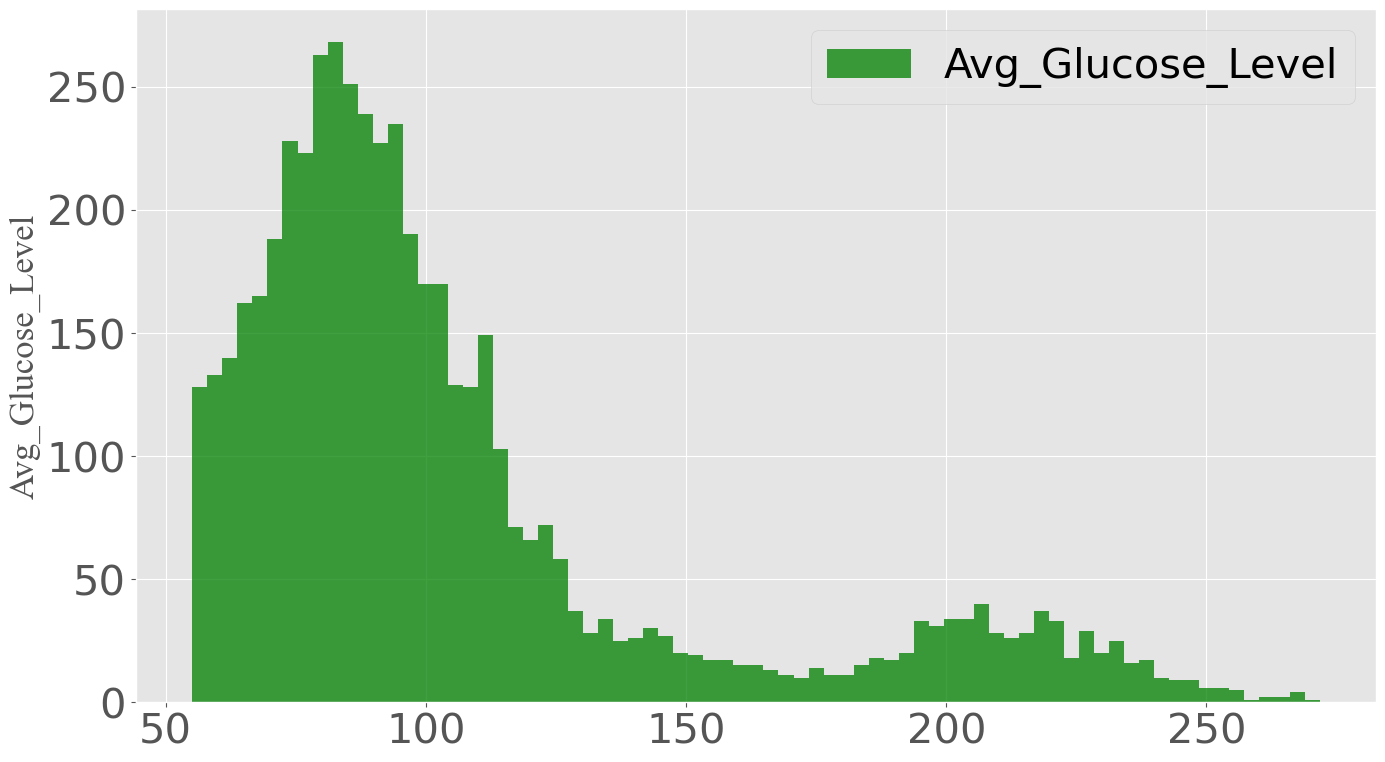

In [23]:
fig, ax = plt.subplots(figsize=(16, 9))

plt.hist(df.Avg_Glucose_Level, bins = 75, label='Avg_Glucose_Level', color='g', alpha=0.75)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('Avg_Glucose_Level', fontsize=25, fontname='Times New Roman')
#plt.ylabel('BMI', fontsize= 25, fontname='Times New Roman')
plt.legend(loc='upper right', fontsize=30)

plt.show()
